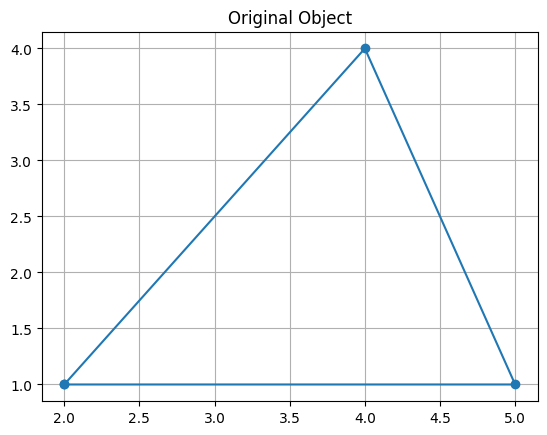

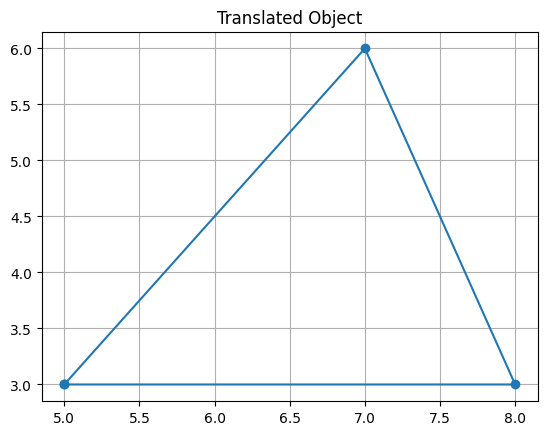

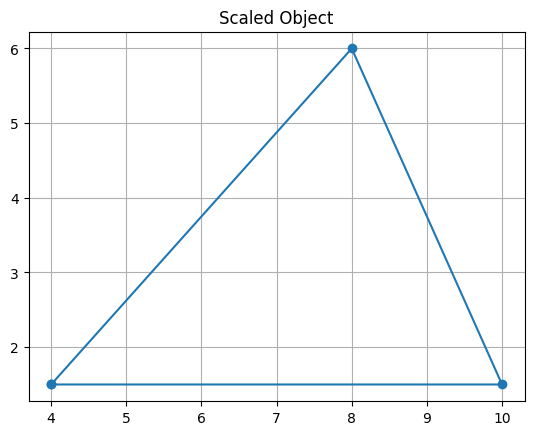

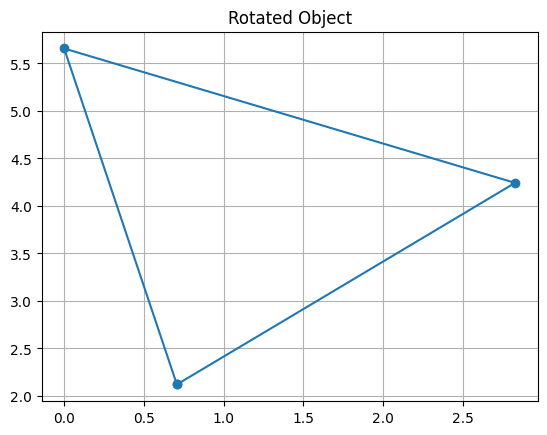

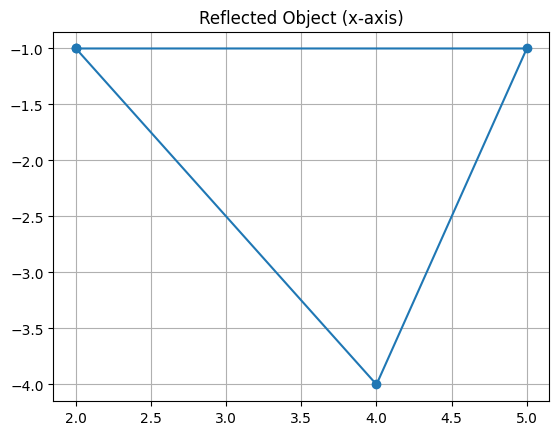

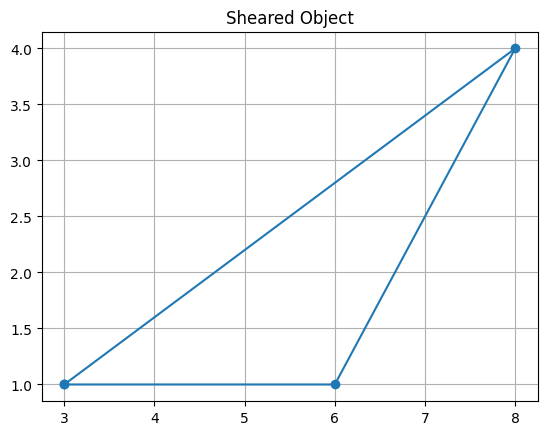

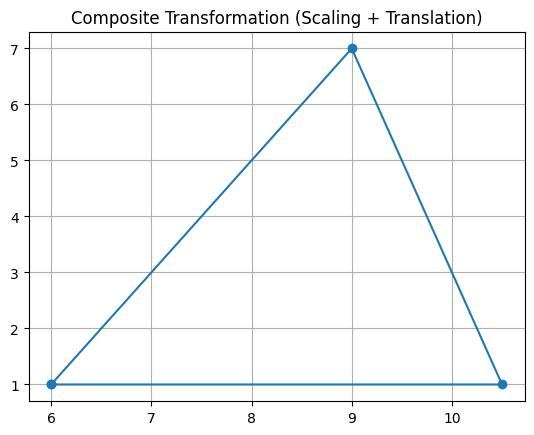

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the object
def plot_object(points, title):
    points = np.append(points, [points[0]], axis=0)  # Close the shape
    plt.plot(points[:, 0], points[:, 1], marker="o")
    plt.title(title)
    plt.grid()
    plt.show()

# Define the 2D object (Triangle as an example)
object_points = np.array([
    [2, 1],
    [5, 1],
    [4, 4]
])

# Plot the original object
plot_object(object_points, "Original Object")

# Translation
def translate(points, tx, ty):
    T = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = points_homogeneous @ T.T
    return transformed_points[:, :2]

translated_points = translate(object_points, 3, 2)
plot_object(translated_points, "Translated Object")

# Scaling
def scale(points, sx, sy):
    S = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = points_homogeneous @ S.T
    return transformed_points[:, :2]

scaled_points = scale(object_points, 2, 1.5)
plot_object(scaled_points, "Scaled Object")

# Rotation
def rotate(points, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    R = np.array([
        [np.cos(angle_radians), -np.sin(angle_radians), 0],
        [np.sin(angle_radians), np.cos(angle_radians), 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = points_homogeneous @ R.T
    return transformed_points[:, :2]

rotated_points = rotate(object_points, 45)
plot_object(rotated_points, "Rotated Object")

# Reflection across x-axis
def reflect_x(points):
    R = np.array([
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = points_homogeneous @ R.T
    return transformed_points[:, :2]

reflected_points = reflect_x(object_points)
plot_object(reflected_points, "Reflected Object (x-axis)")

# Shearing
def shear(points, shear_x, shear_y):
    Sh = np.array([
        [1, shear_x, 0],
        [shear_y, 1, 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed_points = points_homogeneous @ Sh.T
    return transformed_points[:, :2]

sheared_points = shear(object_points, 1, 0)
plot_object(sheared_points, "Sheared Object")

# Composite Transformation: Translation + Scaling
composite_points = translate(scale(object_points, 1.5, 2), 3, -1)
plot_object(composite_points, "Composite Transformation (Scaling + Translation)")

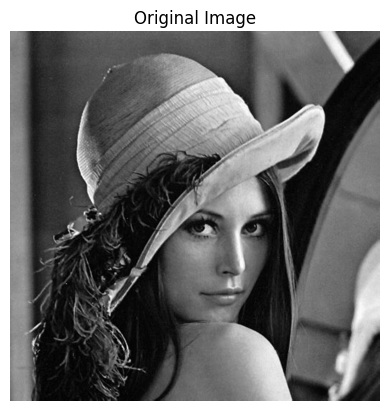

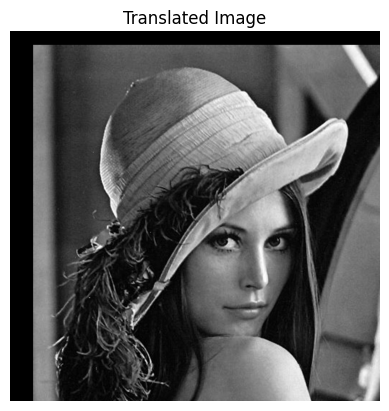

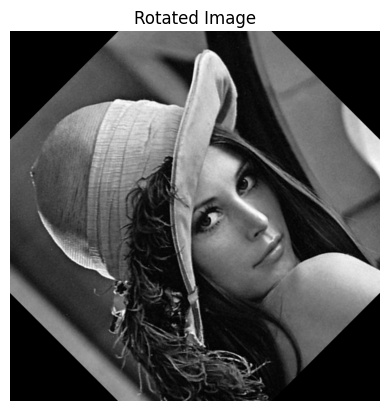

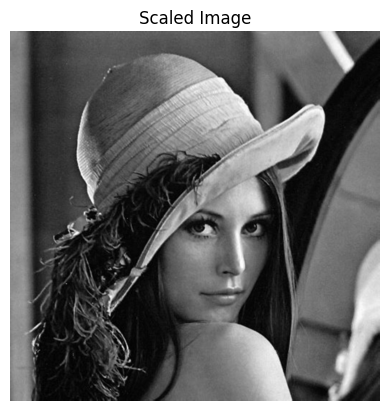

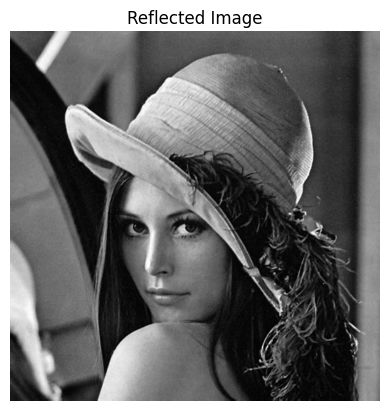

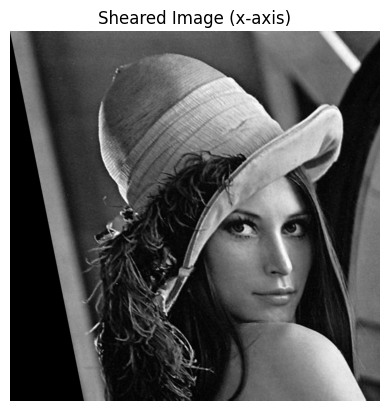

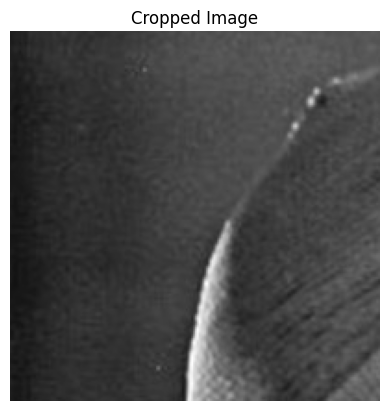

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/WhatsApp Image 2025-01-14 at 11.16.28.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# 1. Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(img, M, (cols, rows))
    return translated

translated_image = translate_image(image, 50, 30)
plt.imshow(translated_image)
plt.title("Translated Image")
plt.axis('off')
plt.show()

# 2. Rotation
def rotate_image(img, angle, scale=1.0):
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols // 2, rows // 2), angle, scale)
    rotated = cv2.warpAffine(img, M, (cols, rows))
    return rotated

rotated_image = rotate_image(image, 45)
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis('off')
plt.show()

# 3. Scaling
def scale_image(img, fx, fy):
    scaled = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled

scaled_image = scale_image(image, 1.5, 1.5)
plt.imshow(scaled_image)
plt.title("Scaled Image")
plt.axis('off')
plt.show()

# 4. Reflection
def reflect_image(img):
    reflected = cv2.flip(img, 1)  # Horizontal flip
    return reflected

reflected_image = reflect_image(image)
plt.imshow(reflected_image)
plt.title("Reflected Image")
plt.axis('off')
plt.show()

# 5. Shearing (x-axis)
def shear_image(img, shear_factor):
    rows, cols = img.shape[:2]
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(img, M, (cols, rows))
    return sheared

sheared_image = shear_image(image, 0.2)
plt.imshow(sheared_image)
plt.title("Sheared Image (x-axis)")
plt.axis('off')
plt.show()

# 6. Cropping
def crop_image(img, start_x, start_y, width, height):
    cropped = img[start_y:start_y + height, start_x:start_x + width]
    return cropped

cropped_image = crop_image(image, 50, 50, 200, 200)
plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.axis('off')
plt.show()